In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
# PCA 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# KMeans
from sklearn.cluster import KMeans


# 2 Main applications of PCA
PCA is used for:
1. Dimensionality reduction
2. Data visualization/EDA

# 3 PCA distributional assumptions
Ideally numeric and standardized data

(kind of assumes linear data) since the PCs are linear combinations of the original features

Assumes PCs are orthogonal (uncorrelated)

# 5 Perform PCA on the MNIST dataset


In [29]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [30]:
# Reshape the data
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

In [31]:
# Standardize the data
scaler = StandardScaler()
pca = PCA()

X_train_std = X_train #scaler.fit_transform(X_train)
X_test_std = X_test # scaler.transform(X_test)




In [32]:
# Fit the PCA
pca.fit(X_train_std)



PCA()

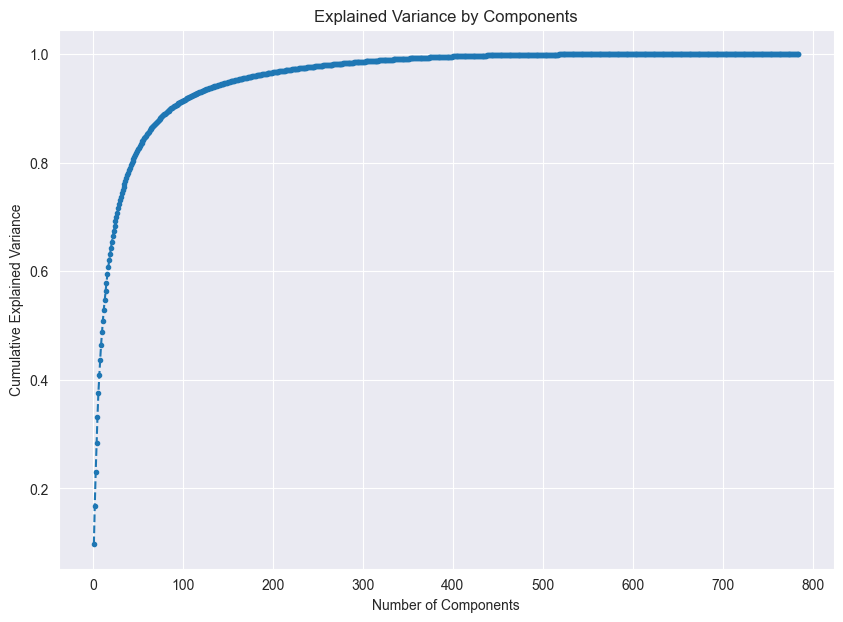

In [33]:
# Plot the explained variance ratio
plt.figure(figsize=(10, 7))
plt.plot(range(1, 785), pca.explained_variance_ratio_.cumsum(), marker='.', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

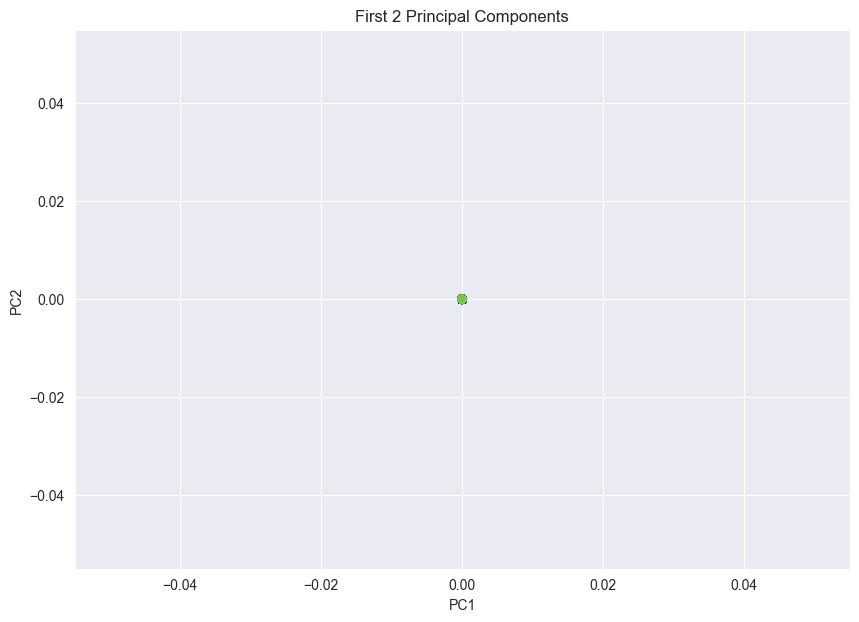

In [34]:
# display the first 2 components
plt.figure(figsize=(10, 7))
plt.scatter(X_train_std[:, 0], X_train_std[:, 1], c=y_train, cmap='viridis', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('First 2 Principal Components')
plt.show()

In [35]:
# fit pca with 2 components
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)



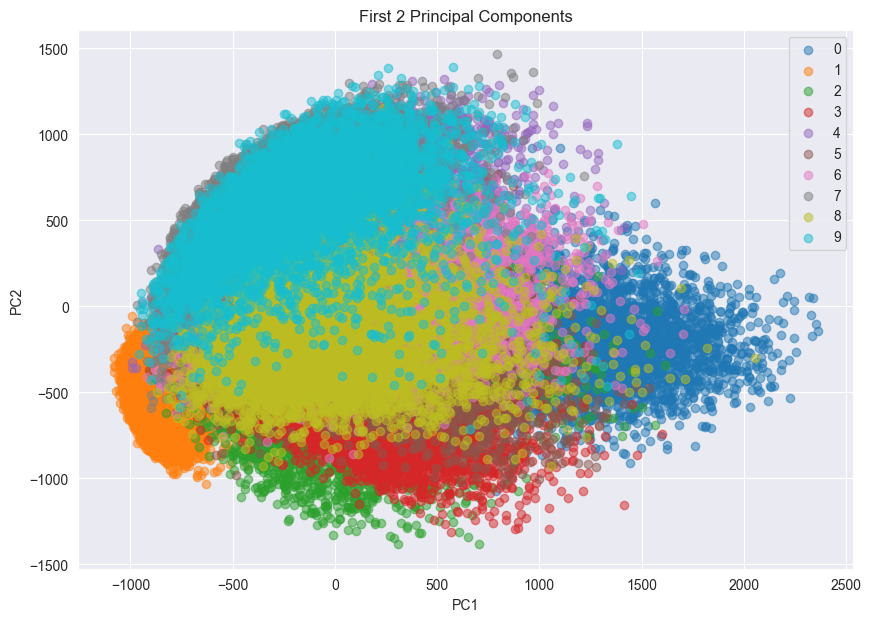

In [36]:
# Plot the first 2 components, add a legend for the digits
plt.figure(figsize=(10, 7))
for i in range(10):
    plt.scatter(X_train_pca[y_train == i, 0], X_train_pca[y_train == i, 1], label=str(i), alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('First 2 Principal Components')
plt.legend()
plt.show()

In [37]:
# fit pca with 3 components
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)



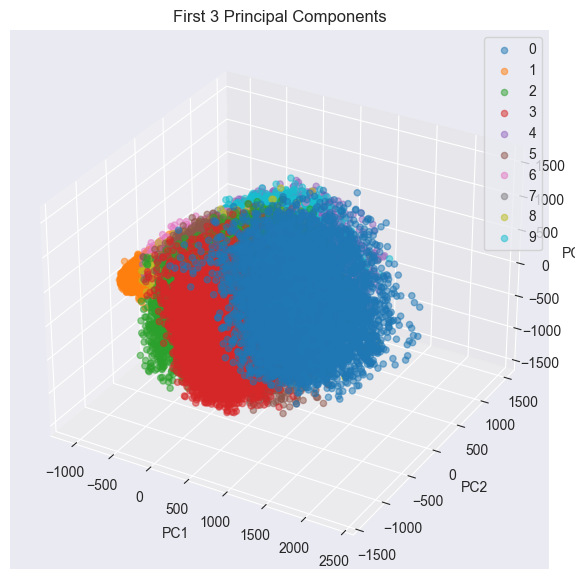

In [38]:
# Plot the first 3 components, add a legend for the digits
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib widget
# use Axes3D to plot in 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
for i in range(10):
    ax.scatter(X_train_pca[y_train == i, 0], X_train_pca[y_train == i, 1], X_train_pca[y_train == i, 2], label=str(i), alpha=0.5)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('First 3 Principal Components')
plt.legend()
plt.show()

# 14 Cluster the data for scenarios 2 and 3 using a density based clustering algorithm

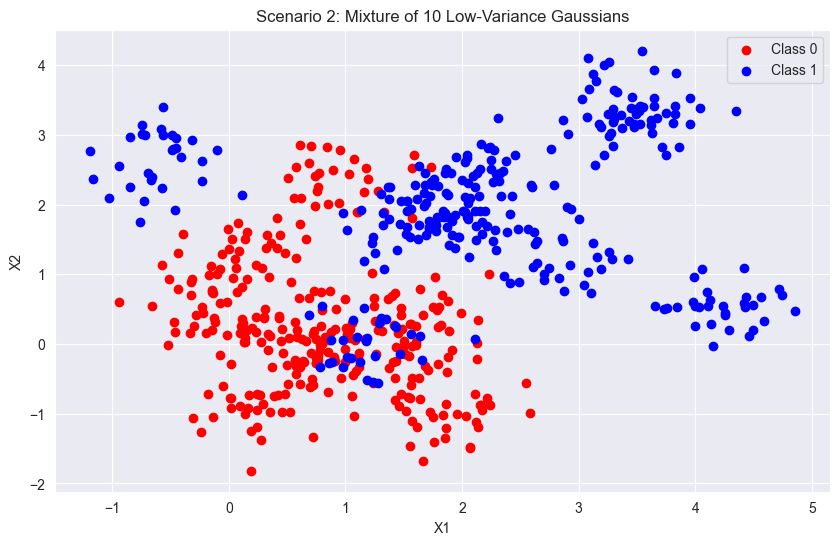

In [39]:
# Scenario 2: Mixture of 10 low-variance Gaussians
np.random.seed(0)
n = 300 
n_gaussians = 10 
low_variance = [[0.1, 0], [0, 0.1]]  # low variance

# distribution of means
meta_mean_class_1 = [0, 0]
meta_cov_class_1 = [[1, 0], [0, 1]]
meta_mean_class_2 = [2, 2]
meta_cov_class_2 = [[1, 0], [0, 1]]

# Generate means for the Gaussian components
means_class_1 = np.random.multivariate_normal(meta_mean_class_1, meta_cov_class_1, n_gaussians)
means_class_2 = np.random.multivariate_normal(meta_mean_class_2, meta_cov_class_2, n_gaussians)

# Generate data for each mixture component
X1 = np.vstack([np.random.multivariate_normal(mean, low_variance, n // n_gaussians) for mean in means_class_1])
X2 = np.vstack([np.random.multivariate_normal(mean, low_variance, n // n_gaussians) for mean in means_class_2])

y1 = np.zeros(X1.shape[0])
y2 = np.ones(X2.shape[0])

X_s2 = np.concatenate((X1, X2))
y_s2 = np.concatenate((y1, y2))

# Plotting the generated data
plt.figure(figsize=(10, 6))
plt.scatter(X1[:, 0], X1[:, 1], color="red", label="Class 0")
plt.scatter(X2[:, 0], X2[:, 1], color="blue", label="Class 1")
plt.title("Scenario 2: Mixture of 10 Low-Variance Gaussians")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.grid(True)
plt.show()


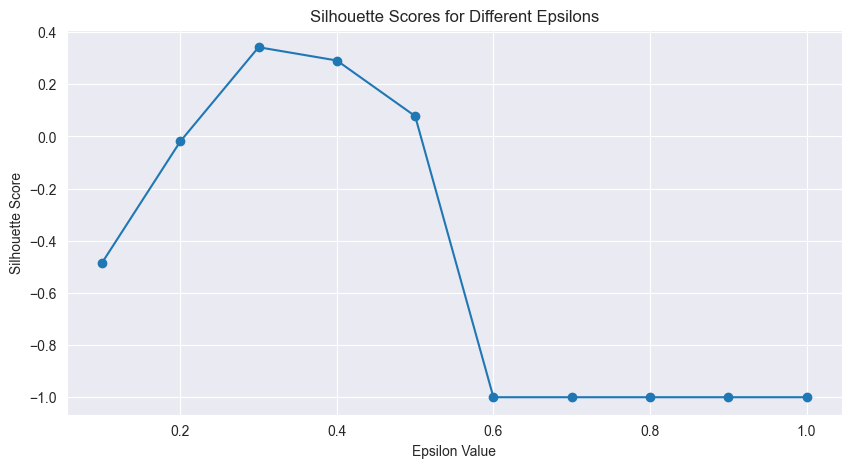

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score

# Assuming X_s2 and y_s2 are your features and labels
X_train, X_test, y_train, y_test = train_test_split(X_s2, y_s2, test_size=0.2, random_state=0)

# Range of epsilon values to try
epsilons = np.linspace(0.1, 1, 10)
silhouette_scores = []

for eps in epsilons:
    # Instantiate DBSCAN with current epsilon and a fixed min_samples
    db = DBSCAN(eps=eps, min_samples=6)
    # Fit DBSCAN on the training data
    clusters = db.fit_predict(X_train)
    
    # Calculate the silhouette score only if more than one cluster and noise exists
    if len(np.unique(clusters)) > 1 and -1 in clusters:
        score = silhouette_score(X_train, clusters)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(-1)  # a way to indicate improper clustering for this epsilon

# Plotting the silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(epsilons, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Epsilons')
plt.xlabel('Epsilon Value')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


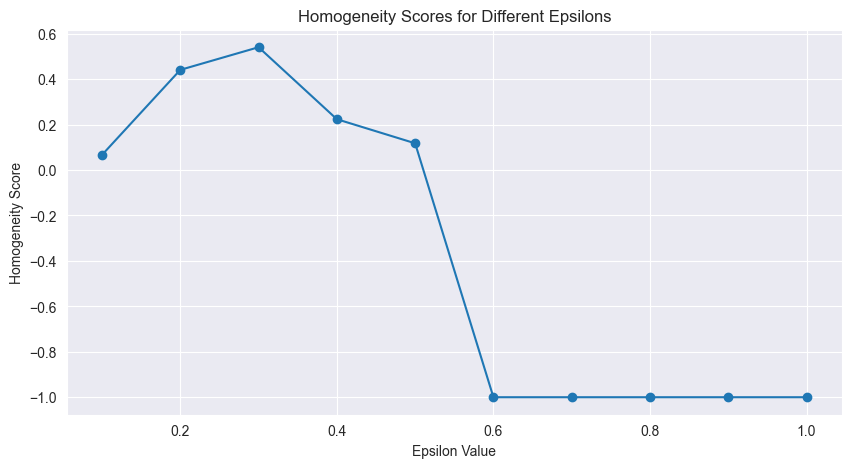

In [41]:
# use a different metric, homogeneity_score
from sklearn.metrics import homogeneity_score

# Range of epsilon values to try
epsilons = np.linspace(0.1, 1, 10)
homogeneity_scores = []

for eps in epsilons:
    # Instantiate DBSCAN with current epsilon and a fixed min_samples
    db = DBSCAN(eps=eps, min_samples=6)
    # Fit DBSCAN on the training data
    clusters = db.fit_predict(X_train)
    
    # Calculate the homogeneity score only if more than one cluster and noise exists
    if len(np.unique(clusters)) > 1 and -1 in clusters:
        score = homogeneity_score(y_train, clusters)
        homogeneity_scores.append(score)
    else:
        homogeneity_scores.append(-1)  # a way to indicate improper clustering for this epsilon
        
# Plotting the scores
plt.figure(figsize=(10, 5))
plt.plot(epsilons, homogeneity_scores, marker='o')
plt.title('Homogeneity Scores for Different Epsilons')
plt.xlabel('Epsilon Value')
plt.ylabel('Homogeneity Score')
plt.grid(True)
plt.show()

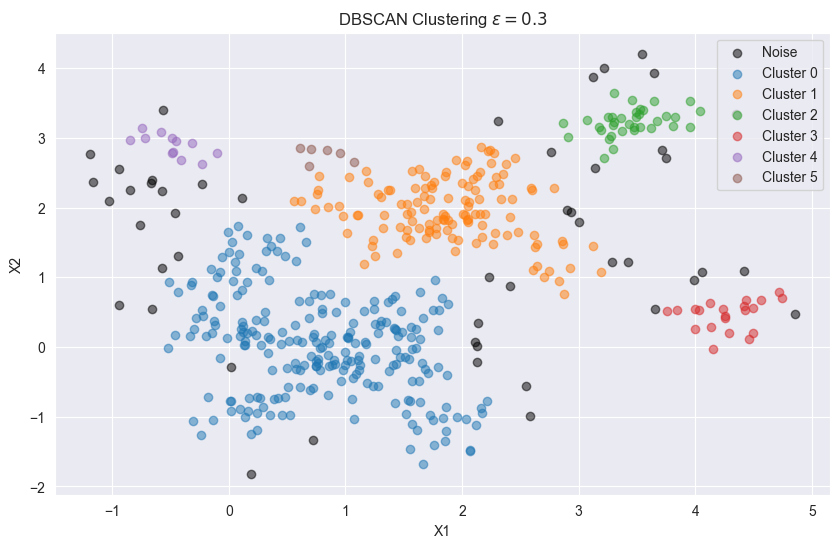

In [42]:
# use epsilon = 0.3
db = DBSCAN(eps=0.3, min_samples=6)

# fit the model
clusters = db.fit_predict(X_train)

# plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_train[clusters == -1, 0], X_train[clusters == -1, 1], color='black', label='Noise', alpha=0.5)
for i in np.unique(clusters):
    if i != -1:
        plt.scatter(X_train[clusters == i, 0], X_train[clusters == i, 1], label=f'Cluster {i}', alpha=0.5)
plt.title('DBSCAN Clustering $\\varepsilon=0.3$')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(True)
plt.show()

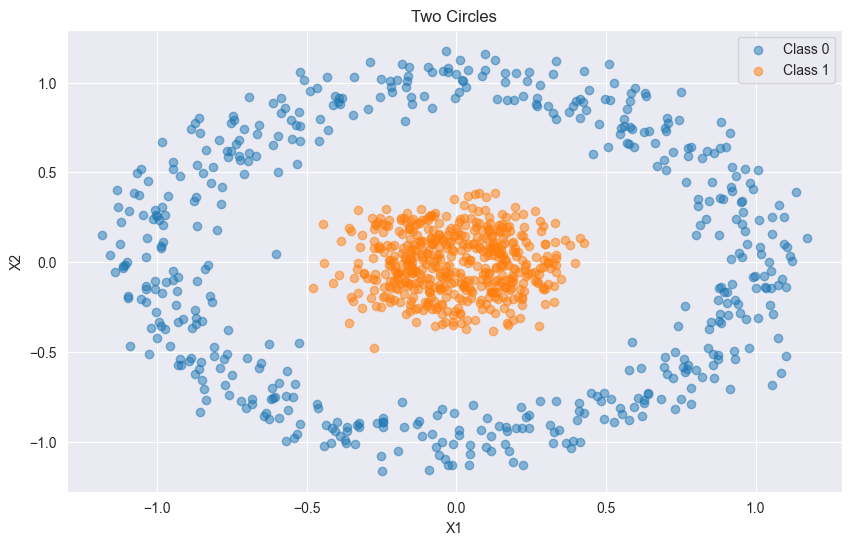

In [43]:
# scenario 3
# create synthetic data (which a SVM with radial kernel would have perfect accuracy on). That is a circle within a circle
from sklearn.datasets import make_circles

# scenario 3
X, y = make_circles(n_samples=1000, noise=0.1, factor=0.2)

# plot the data
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], label='Class 0', alpha=0.5)
plt.scatter(X[y == 1, 0], X[y == 1, 1], label='Class 1', alpha=0.5)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Two Circles')
plt.legend()
plt.show()

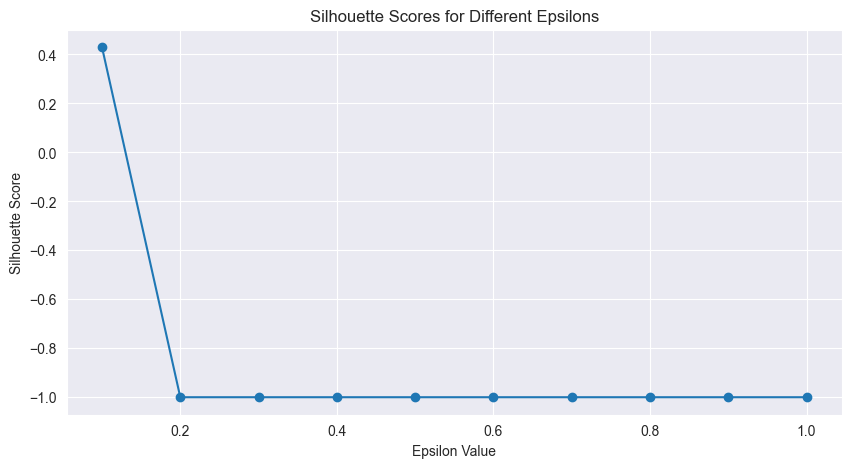

In [44]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Range of epsilon values to try
epsilons = np.linspace(0.1, 1, 10)
silhouette_scores = []

for eps in epsilons:
    # Instantiate DBSCAN with current epsilon and a fixed min_samples
    db = DBSCAN(eps=eps, min_samples=6)
    # Fit DBSCAN on the training data
    clusters = db.fit_predict(X_train)
    
    # Calculate the silhouette score only if more than one cluster and noise exists
    if len(np.unique(clusters)) > 1 and -1 in clusters:
        score = silhouette_score(X_train, clusters)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(-1)  # a way to indicate improper clustering for this epsilon
        
# Plotting the silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(epsilons, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Epsilons')
plt.xlabel('Epsilon Value')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

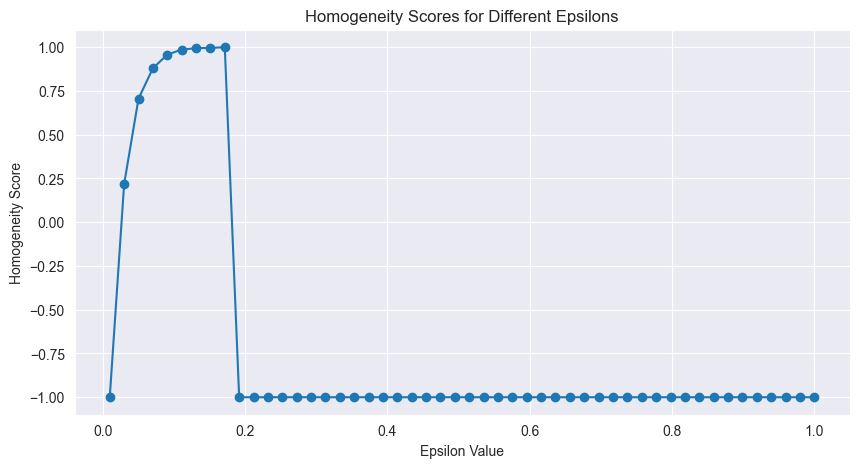

In [45]:
# use a different metric, homogeneity_score

# Range of epsilon values to try
epsilons = np.linspace(0.01, 1, 50)
homogeneity_scores = []

for eps in epsilons:
    # Instantiate DBSCAN with current epsilon and a fixed min_samples
    db = DBSCAN(eps=eps, min_samples=6)
    # Fit DBSCAN on the training data
    clusters = db.fit_predict(X_train, y_train)
    
    # Calculate the homogeneity score only if more than one cluster and noise exists
    if len(np.unique(clusters)) > 1 and -1 in clusters:
        score = homogeneity_score(y_train, clusters)
        homogeneity_scores.append(score)
    else:
        homogeneity_scores.append(-1)  # a way to indicate improper clustering for this epsilon
        
# Plotting the scores
plt.figure(figsize=(10, 5))
plt.plot(epsilons, homogeneity_scores, marker='o')
plt.title('Homogeneity Scores for Different Epsilons')
plt.xlabel('Epsilon Value')
plt.ylabel('Homogeneity Score')
plt.grid(True)
plt.show()

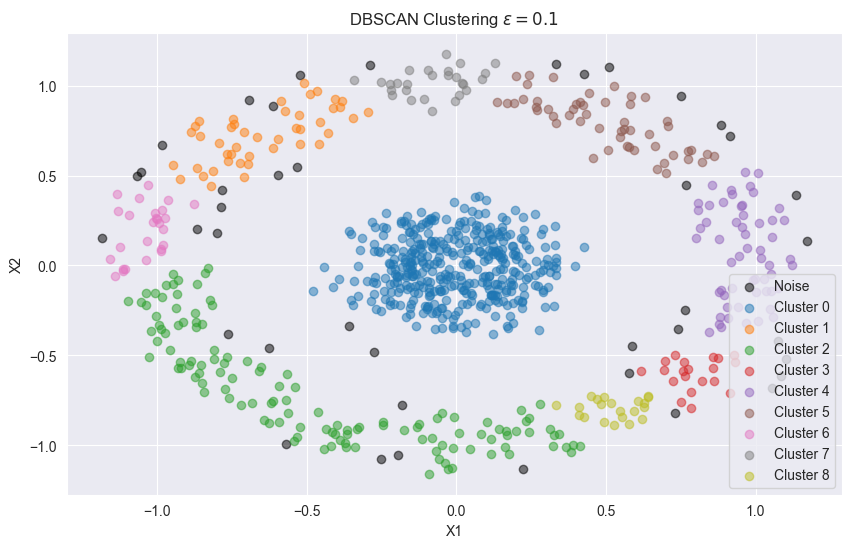

In [46]:
# use epsilon = 0.1
db = DBSCAN(eps=0.1, min_samples=5)

# fit the model
clusters = db.fit_predict(X_train, y_train)

# plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_train[clusters == -1, 0], X_train[clusters == -1, 1], color='black', label='Noise', alpha=0.5)
for i in np.unique(clusters):
    if i != -1:
        plt.scatter(X_train[clusters == i, 0], X_train[clusters == i, 1], label=f'Cluster {i}', alpha=0.5)
plt.title('DBSCAN Clustering $\\varepsilon=0.1$')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(True)
plt.show()

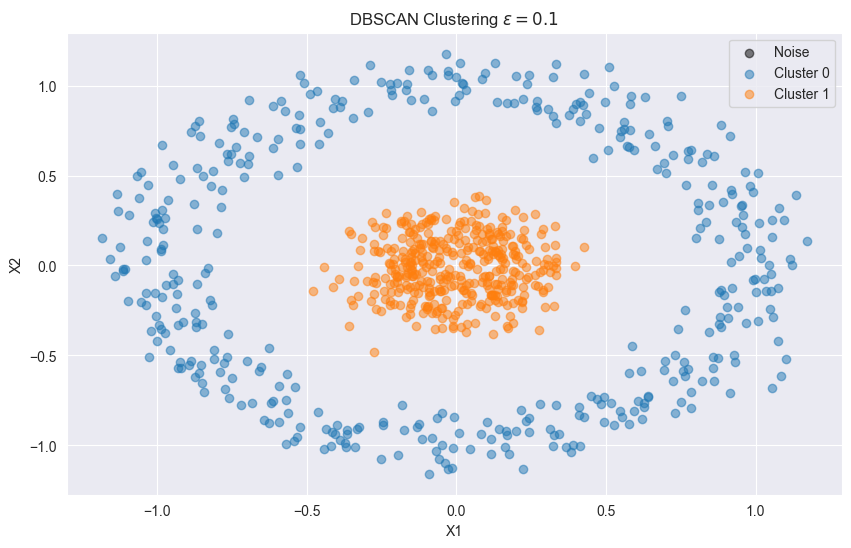

In [47]:
# use epsilon = 0.1
db = DBSCAN(eps=0.2, min_samples=5)

# fit the model
clusters = db.fit_predict(X_train)

# plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_train[clusters == -1, 0], X_train[clusters == -1, 1], color='black', label='Noise', alpha=0.5)
for i in np.unique(clusters):
    if i != -1:
        plt.scatter(X_train[clusters == i, 0], X_train[clusters == i, 1], label=f'Cluster {i}', alpha=0.5)
plt.title('DBSCAN Clustering $\\varepsilon=0.1$')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(True)
plt.show()